# Netflix Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ViewingActivity.csv')
df.head(10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Alex,4/2/2014 15:36,0:07:27,NaN,3,NaN,Apple iPad mini,1:59:10,1:59:10,US (United States)
1,Alex,6/4/2022 3:49,2:01:07,NaN,42,NaN,TCL Malone HDR10 Smart TV,2:01:07,2:01:07,US (United States)
2,Alex,12/18/2018 22:25,0:16:51,NaN,42,NaN,DefaultWidevineAndroidPhone,2:00:27,Not latest view,US (United States)
3,Alex,12/18/2018 22:05,0:13:55,NaN,42,NaN,DefaultWidevineAndroidPhone,1:43:54,Not latest view,US (United States)
4,Alex,12/18/2018 21:58,0:04:01,NaN,42,NaN,DefaultWidevineAndroidPhone,1:30:05,Not latest view,US (United States)
5,Alex,12/18/2018 21:57,0:00:15,NaN,42,NaN,DefaultWidevineAndroidPhone,1:28:34,Not latest view,US (United States)
6,Alex,12/18/2018 19:48,0:23:32,Autoplayed: user action: Unspecified;,42,NaN,Chrome OS (Cadmium),1:28:44,Not latest view,US (United States)
7,Alex,12/18/2018 15:23,1:05:15,Autoplayed: user action: Unspecified;,42,NaN,Chrome OS (Cadmium),1:05:15,Not latest view,US (United States)
8,Alex,7/12/2023 1:50,1:27:06,NaN,65,NaN,Firefox PC (Cadmium),1:27:06,1:27:06,US (United States)
9,Alex,7/9/2023 22:22,0:00:04,Autoplayed: user action: None;,65,NaN,Amazon TVAFTBL Smart TV,0:00:04,Not latest view,US (United States)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42959 entries, 0 to 42958
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             42959 non-null  object
 1   Start Time               42959 non-null  object
 2   Duration                 42959 non-null  object
 3   Attributes               9453 non-null   object
 4   Title                    42959 non-null  object
 5   Supplemental Video Type  2681 non-null   object
 6   Device Type              42959 non-null  object
 7   Bookmark                 42959 non-null  object
 8   Latest Bookmark          42959 non-null  object
 9   Country                  42959 non-null  object
dtypes: object(10)
memory usage: 3.3+ MB


#### Explore columns

In [4]:
df['Attributes'].value_counts()

Autoplayed: user action: None;                                        6347
Autoplayed: user action: Unspecified;                                 1603
Autoplayed: user action: User_Interaction;                            1453
Has branched playback;                                                  42
Has branched playback; Autoplayed: user action: User_Interaction;        4
Autoplayed: user action: Visibility_Timeout;                             2
Has branched playback; Autoplayed: user action: None;                    1
Has branched playback; Autoplayed: user action: Unspecified;             1
Name: Attributes, dtype: int64

In [5]:
df['Title'].value_counts()

Hotel Transylvania 2                                                  69
Spirit: Stallion of the Cimarron                                      68
Minions                                                               53
La Leyenda de la Llorona                                              50
Franco Escamilla: Bienvenido al mundo                                 41
                                                                      ..
Bones: Season 4: The Perfect Pieces in the Purple Pond (Episode 5)     1
A Walk Among the Tombstones_hook_06_16x9                               1
La Familia P. Luche: Season 2: Episode 4                               1
The Fat Boy Chronicles                                                 1
Gigantosaurus: Season 1: Giganto's Laugh (Episode 19)                  1
Name: Title, Length: 19020, dtype: int64

In [6]:
df['Device Type'].value_counts()

Chrome PC (Cadmium)            10547
TCL Malone HDR10 Smart TV       5882
PC                              3390
Apple iPad mini                 2665
DefaultWidevineAndroidPhone     2096
                               ...  
Edge (Cadmium)                     2
iPad Air 2 Cellular                2
LG 2012 MTK Smart TV               2
Apple iPhone 3GS                   1
iPad Air Wi-Fi                     1
Name: Device Type, Length: 64, dtype: int64

### Data Cleaning

Drop columns we will not need

*  Attributes
*  Bookmark
*  Latest Bookmark
*  Country

In [7]:
df = df.drop(['Attributes','Bookmark','Latest Bookmark'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42959 entries, 0 to 42958
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             42959 non-null  object
 1   Start Time               42959 non-null  object
 2   Duration                 42959 non-null  object
 3   Title                    42959 non-null  object
 4   Supplemental Video Type  2681 non-null   object
 5   Device Type              42959 non-null  object
 6   Country                  42959 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


Change column types
*  Start time to datetime datatype

In [8]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                                object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Country                                 object
dtype: object

### Add Time columns
*  Day Name
*  Month
*  Duration in seconds

In [9]:
df['Day Name'] = df['Start Time'].dt.day_name()
df['Month'] = df['Start Time'].dt.month_name()

df.head()


,Profile Name,Start Time,Duration,Title,Supplemental Video Type,Device Type,Country,Day Name,Month
0,Alex,2014-04-02 15:36:00+00:00,0:07:27,3,NaN,Apple iPad mini,US (United States),Wednesday,April
1,Alex,2022-06-04 03:49:00+00:00,2:01:07,42,NaN,TCL Malone HDR10 Smart TV,US (United States),Saturday,June
2,Alex,2018-12-18 22:25:00+00:00,0:16:51,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December
3,Alex,2018-12-18 22:05:00+00:00,0:13:55,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December
4,Alex,2018-12-18 21:58:00+00:00,0:04:01,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December


##### Categorize day name and Create Seasonal column

In [10]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['Day Name'] = pd.Categorical(df['Day Name'], categories=days, ordered=True)

In [11]:
# create function to add Season based on meteorological seasons
# Spring: 3-5
# Summer: 6-8
# Autumn: 9-11
# Winter: 12-2

def season(data):
    """
    data must be in timestamp format
    """
    if data.month in [3,4,5]:
        return 'spring'
    if data.month in [6,7,8]:
        return 'summer'
    if data.month in [9,10,11]:
        return 'autumn'
    else:
        return 'winter'

In [12]:
df['Season'] = df['Start Time'].apply(season)

df.head()

,Profile Name,Start Time,Duration,Title,Supplemental Video Type,Device Type,Country,Day Name,Month,Season
0,Alex,2014-04-02 15:36:00+00:00,0:07:27,3,NaN,Apple iPad mini,US (United States),Wednesday,April,spring
1,Alex,2022-06-04 03:49:00+00:00,2:01:07,42,NaN,TCL Malone HDR10 Smart TV,US (United States),Saturday,June,summer
2,Alex,2018-12-18 22:25:00+00:00,0:16:51,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter
3,Alex,2018-12-18 22:05:00+00:00,0:13:55,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter
4,Alex,2018-12-18 21:58:00+00:00,0:04:01,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter


#### Change Duration to integer for seconds

In [13]:
df['Duration'] = pd.to_timedelta(df['Duration'])

df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Country                                 object
Day Name                              category
Month                                   object
Season                                  object
dtype: object

In [14]:
total_time = df['Duration'].sum()
print(total_time)

682 days 11:22:32


Create total seconds column

In [15]:
df['Seconds'] = df['Duration'].dt.total_seconds().astype(int)

df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Country                                 object
Day Name                              category
Month                                   object
Season                                  object
Seconds                                  int32
dtype: object

In [16]:
df.head()

,Profile Name,Start Time,Duration,Title,Supplemental Video Type,Device Type,Country,Day Name,Month,Season,Seconds
0,Alex,2014-04-02 15:36:00+00:00,0 days 00:07:27,3,NaN,Apple iPad mini,US (United States),Wednesday,April,spring,447
1,Alex,2022-06-04 03:49:00+00:00,0 days 02:01:07,42,NaN,TCL Malone HDR10 Smart TV,US (United States),Saturday,June,summer,7267
2,Alex,2018-12-18 22:25:00+00:00,0 days 00:16:51,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,1011
3,Alex,2018-12-18 22:05:00+00:00,0 days 00:13:55,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,835
4,Alex,2018-12-18 21:58:00+00:00,0 days 00:04:01,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,241


### Clean Title column

In [17]:
df['Title Only'] = df['Title'].str.split(':').str[0]

df.head()

,Profile Name,Start Time,Duration,Title,Supplemental Video Type,Device Type,Country,Day Name,Month,Season,Seconds,Title Only
0,Alex,2014-04-02 15:36:00+00:00,0 days 00:07:27,3,NaN,Apple iPad mini,US (United States),Wednesday,April,spring,447,3
1,Alex,2022-06-04 03:49:00+00:00,0 days 02:01:07,42,NaN,TCL Malone HDR10 Smart TV,US (United States),Saturday,June,summer,7267,42
2,Alex,2018-12-18 22:25:00+00:00,0 days 00:16:51,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,1011,42
3,Alex,2018-12-18 22:05:00+00:00,0 days 00:13:55,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,835,42
4,Alex,2018-12-18 21:58:00+00:00,0 days 00:04:01,42,NaN,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,241,42


In [18]:
df['Title Only'].value_counts()

Suits                                1578
Star Trek                             887
Glee                                  771
Supernatural                          671
Jurassic World Camp Cretaceous        664
                                     ... 
Kung Fu Panda 2_hook_primary_16x9       1
Blood Father_hook_03_16x9               1
One Day on Earth                        1
Teenage                                 1
Chrome and Hot Leather                  1
Name: Title Only, Length: 4430, dtype: int64

Remove Supplemental Video Type column and rows that are not Null

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42959 entries, 0 to 42958
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Profile Name             42959 non-null  object             
 1   Start Time               42959 non-null  datetime64[ns, UTC]
 2   Duration                 42959 non-null  timedelta64[ns]    
 3   Title                    42959 non-null  object             
 4   Supplemental Video Type  2681 non-null   object             
 5   Device Type              42959 non-null  object             
 6   Country                  42959 non-null  object             
 7   Day Name                 42959 non-null  category           
 8   Month                    42959 non-null  object             
 9   Season                   42959 non-null  object             
 10  Seconds                  42959 non-null  int32              
 11  Title Only               429

In [20]:
df_f1 = df[df['Supplemental Video Type'].isnull()]

df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40278 entries, 0 to 42958
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Profile Name             40278 non-null  object             
 1   Start Time               40278 non-null  datetime64[ns, UTC]
 2   Duration                 40278 non-null  timedelta64[ns]    
 3   Title                    40278 non-null  object             
 4   Supplemental Video Type  0 non-null      object             
 5   Device Type              40278 non-null  object             
 6   Country                  40278 non-null  object             
 7   Day Name                 40278 non-null  category           
 8   Month                    40278 non-null  object             
 9   Season                   40278 non-null  object             
 10  Seconds                  40278 non-null  int32              
 11  Title Only               402

In [21]:
df_f1.drop('Supplemental Video Type', axis=1, inplace=True)

C:\Users\irama\anaconda3\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40278 entries, 0 to 42958
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Profile Name  40278 non-null  object             
 1   Start Time    40278 non-null  datetime64[ns, UTC]
 2   Duration      40278 non-null  timedelta64[ns]    
 3   Title         40278 non-null  object             
 4   Device Type   40278 non-null  object             
 5   Country       40278 non-null  object             
 6   Day Name      40278 non-null  category           
 7   Month         40278 non-null  object             
 8   Season        40278 non-null  object             
 9   Seconds       40278 non-null  int32              
 10  Title Only    40278 non-null  object             
dtypes: category(1), datetime64[ns, UTC](1), int32(1), object(7), timedelta64[ns](1)
memory usage: 3.3+ MB


Create column that identifies if a title is a show or movie for later analysis

In [23]:
# create get show_movie function

def show_movie(data):
    """
    classifies a title as show or movie based on the following:
    
    if title contains 'season','episode', or 'volume'
    return 'show'
    else 'movie'
    """
    title_lower = data.lower()
    
    if 'season' in title_lower or 'episode' in title_lower or 'volume' in title_lower:
        return 'show'
    else:
        return 'movie'

In [24]:
df_f1['Video Type'] = df_f1['Title'].apply(show_movie)

df_f1.head()

<ipython-input-24-7b2e018bd2c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f1['Video Type'] = df_f1['Title'].apply(show_movie)


,Profile Name,Start Time,Duration,Title,Device Type,Country,Day Name,Month,Season,Seconds,Title Only,Video Type
0,Alex,2014-04-02 15:36:00+00:00,0 days 00:07:27,3,Apple iPad mini,US (United States),Wednesday,April,spring,447,3,movie
1,Alex,2022-06-04 03:49:00+00:00,0 days 02:01:07,42,TCL Malone HDR10 Smart TV,US (United States),Saturday,June,summer,7267,42,movie
2,Alex,2018-12-18 22:25:00+00:00,0 days 00:16:51,42,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,1011,42,movie
3,Alex,2018-12-18 22:05:00+00:00,0 days 00:13:55,42,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,835,42,movie
4,Alex,2018-12-18 21:58:00+00:00,0 days 00:04:01,42,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,241,42,movie


In [25]:
df_f1['Video Type'].value_counts()

show     32534
movie     7744
Name: Video Type, dtype: int64

#### Clean up Device type column

Compress column to the following values
*  Laptop/Desktop
*  Phone
*  Tablet
*  Gaming

In [26]:
distinct_devices = df_f1['Device Type'].unique()
print(distinct_devices)

['Apple iPad mini' 'TCL Malone HDR10 Smart TV'
 'DefaultWidevineAndroidPhone' 'Chrome OS (Cadmium)'
 'Firefox PC (Cadmium)' 'Amazon TVAFTBL Smart TV' 'PC'
 'Microsoft Xbox 360' 'Roku Midland Smart TV'
 'Apple iPad 6th Gen 9.7 (Wi-Fi) iPad' 'Chrome PC (Cadmium)'
 'Vizio VIA DTV MTK 5396 Foxconn' 'Vizio MT5580-Amtran-1H2013 Smart TV'
 'Cox COX X1 MIPS WITH SAGE' 'Wii Bowser' 'Apple iPhone 4 with GSM'
 'Android DefaultWidevineL3Phone Android Phone (samsung_SM-G531H)'
 'Android DefaultWidevineL3Phone Android Phone'
 'DefaultWidevineAndroidPhone (samsung_SM-G920T)' 'Mobile'
 'Safari MAC (Cadmium)' 'Apple iPhone 13 Pro' 'Sony PS4'
 'Netflix Windows App - Cadmium Windows Mobile'
 'Google Chromecast V5 Streaming Stick'
 'Contour TV (Cox COX X1 MIPS NO SAGE)' 'Apple iPhone XR'
 'DefaultWidevineAndroidTablets' '2013 Sony BD players BX Series '
 'iPhone 5S GSM' 'iPhone 4 GSM Rev A'
 'Amazon Fire TV Stick 2020 Lite Streaming Stick'
 'Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV'
 'Vizio MG142 TPV

Create function to summarize device type

In [27]:
import re

In [28]:
def dev_type(device):
    """
    This function groups device names into 5 types: mobile, tablet, computer, gaming, tv
    
    We will use the following conditions to filter down
    
    Mobile: iphone, android, ipod, mobile
    Tablet: ipad, tablet
    Computer: chrome, cox, edge, windows, pc
    Gaming: xbox, ps4, wii
    TV: tv
    Other: everything else if any
    
    """
    
    device_lower = device.lower() 
    
    mobile_patt = [r'.*iphone.*',r'.*android.*',r'.*ipod.*',r'.*mobile.*']
    tablet_patt = [r'.*ipad.*',r'.*tablet.*']
    computer_patt = [r'.*chrome.*',r'.*cox.*',r'.*edge.*',r'.*windows.*',r'.*pc.*']
    gaming_patt = [r'.*xbox.*',r'.*ps4.*',r'.*wii.*']
    tv_patt = [r'.*tv.*']
    
    # MOBILE
    for pattern in mobile_patt:
        if re.search(pattern, device_lower):
            return 'mobile'
    # TABLET
    for pattern in tablet_patt:
        if re.search(pattern, device_lower):
            return 'tablet'
    # COMPUTER    
    for pattern in computer_patt:
        if re.search(pattern, device_lower):
            return 'computer'
    # GAMING    
    for pattern in gaming_patt:
        if re.search(pattern, device_lower):
            return 'gaming'
    # TV    
    for pattern in tv_patt:
        if re.search(pattern, device_lower):
            return 'tv'
            
        
    return 'other'

In [29]:
df_f1['Device Group'] = df_f1['Device Type'].apply(dev_type)

<ipython-input-29-6e7ffd8f6f11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f1['Device Group'] = df_f1['Device Type'].apply(dev_type)


In [30]:
df_f1['Device Group'].value_counts()

computer    15317
mobile      10372
tv           8506
tablet       3537
gaming       1735
other         811
Name: Device Group, dtype: int64

## Visually explore data to identify what else needs to be cleaned up

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
df_f1.describe(percentiles=[.15,.25,.5,.75,.90,.95,])

,Duration,Seconds
count,40278,40278.000000
mean,0 days 00:24:22.194324445,1462.194324
std,0 days 00:23:05.545316318,1385.545316
min,0 days 00:00:01,1.000000
15%,0 days 00:02:15,135.000000
25%,0 days 00:06:33.250000,393.250000
50%,0 days 00:21:01,1261.000000
75%,0 days 00:38:31,2311.000000
90%,0 days 00:47:09,2829.000000
95%,0 days 01:09:32.150000,4172.150000


In [33]:
sec_dist = df_f1['Seconds'].value_counts()
sec_dist = sec_dist.reset_index()

sec_dist.columns = ['Seconds','Count']
sec_dist.head()

,Seconds,Count
0,1,337
1,2,287
2,3,281
3,4,238
4,5,199


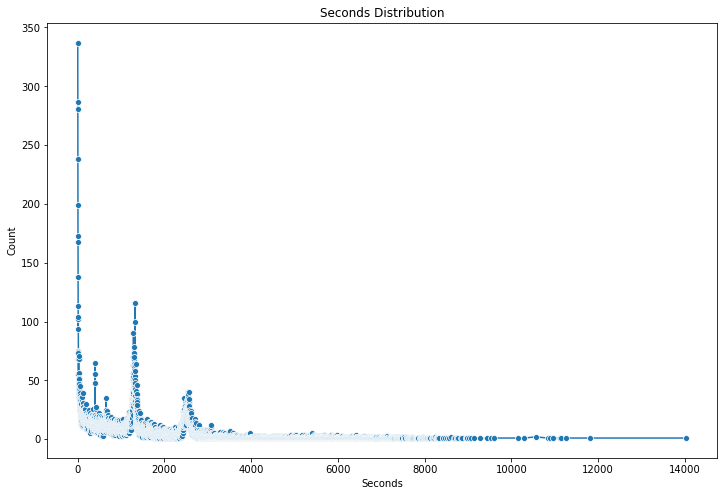

In [34]:
plt.figure(figsize=(12,8))

sns.lineplot(data=sec_dist, x='Seconds',y='Count', marker='o')

plt.title('Seconds Distribution')
plt.xlabel('Seconds')

plt.show()

### Explore watch history duration

In [35]:
df_f2 = df_f1[df_f1['Seconds'] >= 300]

df_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31536 entries, 0 to 42958
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Profile Name  31536 non-null  object             
 1   Start Time    31536 non-null  datetime64[ns, UTC]
 2   Duration      31536 non-null  timedelta64[ns]    
 3   Title         31536 non-null  object             
 4   Device Type   31536 non-null  object             
 5   Country       31536 non-null  object             
 6   Day Name      31536 non-null  category           
 7   Month         31536 non-null  object             
 8   Season        31536 non-null  object             
 9   Seconds       31536 non-null  int32              
 10  Title Only    31536 non-null  object             
 11  Video Type    31536 non-null  object             
 12  Device Group  31536 non-null  object             
dtypes: category(1), datetime64[ns, UTC](1), int32(1), object(9), 

In [36]:
sec_dist2 = df_f2['Seconds'].value_counts()
sec_dist2 = sec_dist2.reset_index()

sec_dist2.columns = ['Seconds','Count']
sec_dist2.head()

,Seconds,Count
0,1323,116
1,1324,100
2,1286,90
3,1299,78
4,1298,73


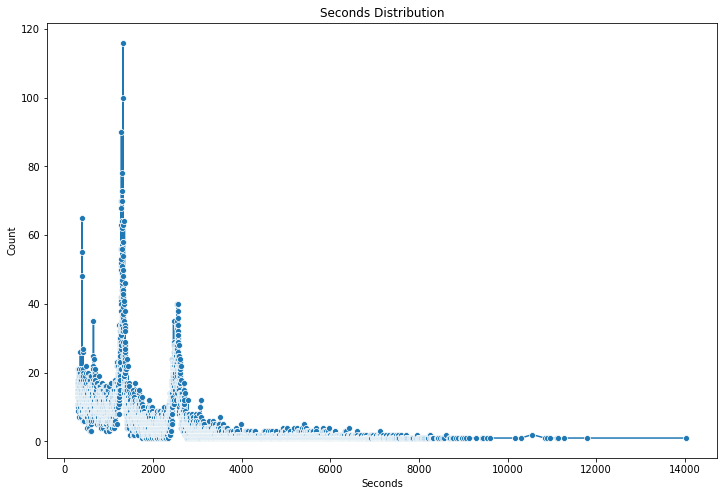

In [37]:
plt.figure(figsize=(12,8))

sns.lineplot(data=sec_dist2, x='Seconds',y='Count', marker='o')

plt.title('Seconds Distribution')
plt.xlabel('Seconds')

plt.show()

In [38]:
df_f2.describe()

,Duration,Seconds
count,31536,31536.000000
mean,0 days 00:30:41.700913242,1841.700913
std,0 days 00:22:16.439663219,1336.439663
min,0 days 00:05:00,300.000000
25%,0 days 00:16:02,962.000000
50%,0 days 00:22:55,1375.000000
75%,0 days 00:41:40,2500.000000
max,0 days 03:53:58,14038.000000


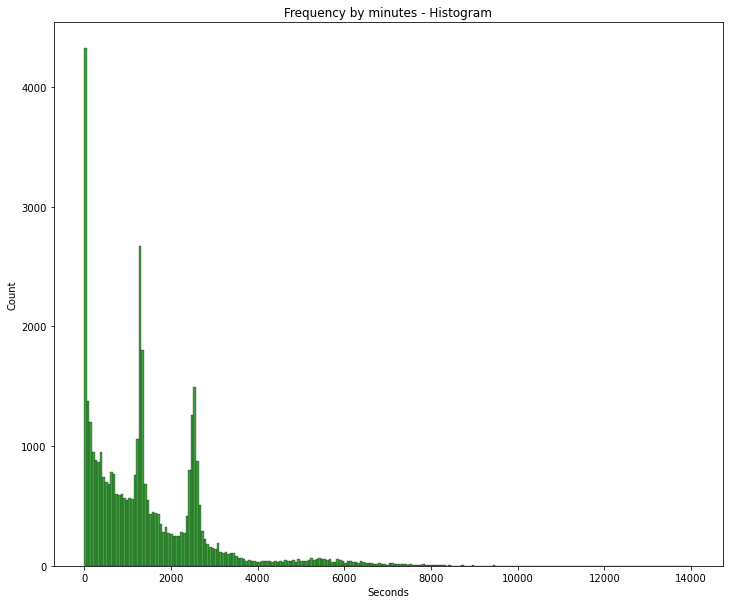

In [39]:
plt.figure(figsize=(12, 10))

sns.histplot(sec_dist, x='Seconds', weights='Count', bins=range(0, int(max(sec_dist['Seconds'])) + 60, 60), kde=False, color='green', edgecolor='black')

plt.title('Frequency by minutes - Histogram')

plt.show()

### Export final dataset for Tableau reporting

In [40]:
df_f2.to_csv('2024_Netflix.csv', index=False)

In [41]:
df_f2.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country,Day Name,Month,Season,Seconds,Title Only,Video Type,Device Group
0,Alex,2014-04-02 15:36:00+00:00,0 days 00:07:27,3,Apple iPad mini,US (United States),Wednesday,April,spring,447,3,movie,tablet
1,Alex,2022-06-04 03:49:00+00:00,0 days 02:01:07,42,TCL Malone HDR10 Smart TV,US (United States),Saturday,June,summer,7267,42,movie,tv
2,Alex,2018-12-18 22:25:00+00:00,0 days 00:16:51,42,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,1011,42,movie,mobile
3,Alex,2018-12-18 22:05:00+00:00,0 days 00:13:55,42,DefaultWidevineAndroidPhone,US (United States),Tuesday,December,winter,835,42,movie,mobile
6,Alex,2018-12-18 19:48:00+00:00,0 days 00:23:32,42,Chrome OS (Cadmium),US (United States),Tuesday,December,winter,1412,42,movie,computer
